# Topics (related to the midterm project):

## 1. Regular Expression (regex, or sometimes RE)
## 2. return vs. yield
## 3. random.sample, numpy.random, and histogram plots 

## Regular expression


###"The limits of my language mean the limits of my world."  

###\- Ludwig Wittgenstein


Resources:

* *Effective Computation in Physics * Chapter 8

* https://docs.python.org/2/library/re.html

### re.match(pattern, string, flags=0)


###pattern:	This is the regular expression to be matched.

###string:	This is the string, which would be searched to match the pattern at the beginning of string.

###flags:	You can specify different flags, e.g., to do case insensitive search, use flags = re.I (for all flags: https://docs.python.org/2/howto/regex.html)


### The match() function returns a match object on success, None on failure.  

### Use group(num) or groups() function of match object to get matched expression.


###*Note: match() checks for a match only at the beginning of the string*

In [ ]:
# A match!
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')
print m
print m.group()

In [ ]:
# A match!  [0-9] --> \d
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9]\d", '2015-12-16')
print m
print m.group()

In [ ]:
# No match
import re
m = re.match("20[01][0-9].*[0-9][ 0-9].*[0-9][0-9]", '20')
print m

In [ ]:
# match or not?  '2015-12-16' --> '2015a12b16'
import re
m = re.match("20[01][0-9].*[ 0-9][ 0-9].*[0-9][0-9]", '2015a12b16')
if m:
    print m.group()

In [ ]:
# match or not?  second '.*' --> [^a-z]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a-z][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?  [^a-z] --> [^a]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2019adlkfj are1216')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?
import re
m = re.match(" 20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015^12&16')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?
import re
m = re.match(".*20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# Match or not?
import re
m = re.match(".*20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015.12.16.  You just wait and see.')
print m

## re.search()

### If you want to locate a match anywhere in string, use search()

In [ ]:
import re
m = re.search("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
print m
print m.group()

In [ ]:
# the .group() method, and note: the second occurrence was ignored.
import re
m = re.search("(20[01][0-9])-([0-9][0-9])-([0-9][0-9])", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-16.')
print m.group()
print m.group(0)
print 'year:', m.group(1)
print 'month:', m.group(2)
print 'date:', m.group(3)

## re.findall

### To find all occurrences, and return the results as a list

In [ ]:
# Match!
import re
m = re.findall("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-18.')
print m, type(m)

In [ ]:
import re
m = re.match(".* ([0-9]*\.[0-9]*)","The current men's \
world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009," )
if m:
    print 'my time is', m.group(1), 'seconds'
else:
    print 'no match'
    

## Breakout Problem:

### The following text is copied from wikipedia,

### "The current men's world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009,"

### By using re.match(), extract the world record time.  You cannot use any actual words in your pattern, e.g. "seconds" would not be allowed.



## return vs. yield

In [ ]:
# A peculiar thing about enumerate(): you can't use len() with enumerate()!
from collections import Iterable
y = range(7,10)
print len(y)
print isinstance(y, Iterable)

z = enumerate(range(7,10))
print isinstance(z, Iterable)
#print len(z)                     # will get error.
print z.next()
print z.next()
#print z[3]

#called a generator


## eunmerate() *is* an iterable; but not all iterables have a length!

In [ ]:
# return:
def create_integers(N):
    lst=[]
    for i in range(N):
        lst.append(i)
    return lst
newints = create_integers(6)    
print newints 


In [ ]:
print type(create_integers), type(newints)


In [ ]:
# yield:
from pdb import set_trace
def generate_integers(N):
    for i in range(N):
        # note: it's inside the for loop!
        yield i
        #set_trace()
        print 'The {:d}th time generate_integers() is called'.format(i+1)
gen = generate_integers(6)
print type(generate_integers), type(gen)


In [ ]:
# It shows you that the next generate_integers() is called, 
# python starts from the statement immediately below the yield statement.
# the second time it goes into the generator, it goes into the statemennt just beyond yield
gen.next()

In [ ]:
for i in range(6):
    print gen.next()


In [ ]:
# You will get error if the previous cell has been run.
for i in range(6):
    print gen.next()

In [137]:
def fib():
    fib0 = 0
    fib1 = 1
    fib2 = 0
    while True:
        yield fib2
        fib2 = fib0 + fib1
        fib0 = fib1
        fib1 = fib2
        
        
fibbsalot = fib()

    
    
    
            
    

In [138]:
def fib2():
    a = 0
    b = 1
    while True:
        yield a
        a, b = b, a+b
        
fibby = fib2()

##Breakout Problem: Write a function that generates all Fibonacci numbers less than 300 by using yield.  

Definition: F\_n = F\_{n-1} + F\_{n-2}; F\_0 = 0 and F\_1 = 1.  

Hint: Once you have calculated F\_3, you have no need for F\_0 and F\_1; 
once you know F\_4, you have no need for F\_3 and F\_2; and so forth.
So for every new round, you only need to keep the previous two numbers.

Computing by hand:
F\_0 = 0
F\_1 = 1
F\_2 = 1
F\_3 = 2
...


In [139]:
ind = 0
for i in fibbsalot:
    #print 'ind = ', ind
    ind += 1
    if i > 500:
        break
    else:
        print i
        
    
for i in fibby:
    #print 'ind = ', ind
    ind += 1
    if i > 3000:
        break
    else:
        print i
        
# Let's work out the flow of the code.
# This is an elegant, memory efficient way of generating Fibonacci numbers 
# (note: at any time only the latest two Fibonacci numbers take up memory, 
# as is necessary for the calculation of the next Fib number.   
# All previous Fib numbers are "forgotten"!)
# This is very different from the "list" way of doing things, where every element 
# takes up memory.


0
1
2
3
5
8
13
21
34
55
89
144
233
377
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584


## The random module

from http://docs.python.org/2/library/random.html:

In [48]:
import random
lst = ['a', 'b', 'c', 'd', 'x', 'y', 'z']
random.shuffle(lst)   ### this shuffles the list in place.  
print lst   ### you can run this as many times as you want.

['y', 'b', 'c', 'z', 'a', 'x', 'd']


In [285]:
import random
random.random()

0.020203517739108445

##random.sample(population, k)

Return a k length list of unique elements chosen from the population sequence. 

Returns a new list containing elements from the population while leaving the original population unchanged. 


In [455]:
# Example of random.sample:
from random import sample
print sample(xrange(100000), 1000)
# Note the difference between xrange() and range(): xrange() doesn't create an entire list, 
# but creates the values when asked for them.
# So it's much better to use xrange() here owing to the large argument.

[18254, 87324, 41908, 37083, 8147, 89480, 95815, 40297, 29391, 42057, 28404, 70275, 44792, 8152, 85027, 51469, 25169, 66135, 14709, 24656, 30868, 83736, 4610, 90494, 34743, 44966, 62420, 50856, 40615, 97590, 3319, 35034, 1736, 98126, 98056, 36384, 81473, 26324, 92504, 49675, 17027, 65816, 69601, 57099, 17712, 95404, 43740, 16734, 90123, 63875, 34323, 52597, 6910, 2726, 5997, 32220, 11334, 22258, 61764, 69491, 24725, 58667, 36140, 47772, 55328, 79936, 46553, 51825, 55118, 73858, 13194, 45158, 54629, 41402, 73346, 97017, 52151, 59306, 18301, 65309, 37862, 42064, 83104, 38658, 35601, 1280, 18592, 14339, 31205, 93580, 5568, 83171, 27593, 62888, 97398, 75693, 14506, 29078, 73389, 20867, 25639, 14993, 15302, 3469, 88091, 24069, 65430, 84245, 31622, 78620, 51741, 37403, 66809, 91461, 48916, 15235, 18346, 49881, 68624, 23688, 77992, 46081, 35904, 22479, 4423, 81682, 82749, 87467, 72542, 50962, 26078, 31243, 9279, 11358, 20266, 35805, 66351, 97636, 94087, 95945, 13216, 48970, 24652, 46252, 2144

In [468]:
for i in range(1000):
    print random.random()

0.427976494653
0.873264020137
0.89518990694
0.213179559337
0.538244596686
0.648114074627
0.302755397544
0.263784853577
0.730867500115
0.782712020173
0.958232533285
0.101264099312
0.31188832776
0.684325897916
0.747184908489
0.438839191727
0.146655360481
0.765906573896
0.817646908923
0.0716893199668
0.123861963932
0.9554521267
0.463319132646
0.88626882648
0.0544254216564
0.507252645981
0.296557677506
0.214327351033
0.205513292739
0.0942606592385
0.948259520488
0.143944559511
0.741543271455
0.877641366925
0.207431839961
0.555118744324
0.902781964454
0.908676312555
0.0348843057692
0.861345596641
0.244474669457
0.408287654136
0.631816026062
0.456078312178
0.639432200422
0.895651885532
0.0610535165823
0.632526738246
0.481410612207
0.587506557294
0.870105454838
0.0258321035314
0.3260518536
0.784405515229
0.0774595016604
0.556458258159
0.157502431812
0.782767856047
0.261100406678
0.0119880880517
0.310734707692
0.32143950053
0.281328309576
0.731831731792
0.393635226291
0.490545973564
0.21380739

In [559]:
### Another example: 
from string import ascii_lowercase
print type(ascii_lowercase), len(ascii_lowercase)
# So yes, you can only import modules, functions but also strings and other objects.
# In Python: almost everything is an object (modules, functions, strings, ints, floats,
# dictionaries, lists, classes, etc.)
# and therefore, there is no fundamental difference between them in terms of how they
# are treated and used in Python.
print ascii_lowercase
print sample(ascii_lowercase, 10)

<type 'str'> 26
abcdefghijklmnopqrstuvwxyz
['g', 'u', 'c', 'a', 'i', 'f', 'q', 'z', 'o', 's']


## ASCII stands for: American Standard Code for Information Interchange

## numpy.random

http://docs.scipy.org/doc/numpy/reference/routines.random.html

Gaussian distribution -- mu is the mean, and sigma is the standard deviation. 

In [1539]:
from numpy.random import randn
x = randn()
print x

1.39688673027


In [ ]:
import numpy as np
from numpy.random import randn
x = randn(1000000000000)*2. + 3.
print x
print np.mean(x)
print np.std(x)

n (normalized height, or probability density): [  4.47739717e-05   0.00000000e+00   2.23869859e-04   2.23869859e-04
   2.68643830e-04   7.16383548e-04   7.16383548e-04   1.74618490e-03
   1.61186298e-03   2.14915064e-03   2.73121228e-03   4.34307526e-03
   4.47739717e-03   7.96976697e-03   9.13389024e-03   1.13725888e-02
   1.28053559e-02   1.43724449e-02   1.70141093e-02   1.99244174e-02
   2.26108557e-02   2.58793557e-02   2.70882529e-02   2.68643830e-02
   2.65061913e-02   2.72673488e-02   2.42674927e-02   2.43570406e-02
   2.22078900e-02   1.89841640e-02   1.84916503e-02   1.49545066e-02
   1.09696231e-02   1.02980135e-02   8.68615052e-03   6.98473959e-03
   5.28332867e-03   4.11920540e-03   2.55211639e-03   2.50734242e-03
   1.70141093e-03   1.70141093e-03   4.92513689e-04   4.92513689e-04
   1.79095887e-04   8.95479435e-05   1.34321915e-04   8.95479435e-05
   4.47739717e-05   8.95479435e-05] 50
bins (locations of bin edges): [  45.66100097   47.89444143   50.12788189   52.3613223

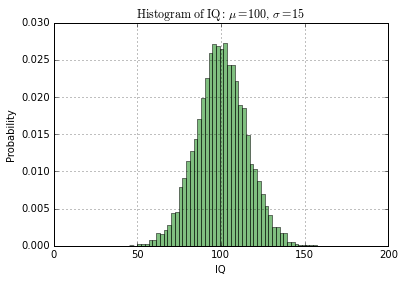

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(10000)*15 + 100
fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data

Nbins = 50
# normed=1: the total area adds up to 1; # alpha: level of tranparency.
n, bins, patches = ax.hist(x, Nbins, normed=1, facecolor='green', alpha=.5)
print 'n (normalized height, or probability density):', n, len(n)
print 'bins (locations of bin edges):', bins, len(bins)

# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be Nbin probability
# density values (n), Nbin+1 bin edges (bins), and finally, Nbin patches.

ax.set_xlabel('IQ')
ax.set_ylabel('Probability')
# The is Latex, a typsetting "program".
ax.set_title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# Pay attention to how the x and y axis limits are set.
ax.set_xlim(0, 200)
ax.set_ylim(0, 0.03)
ax.grid(True)

plt.show()


## End of wk 6-1